# Schrödingers Cat

We are using a quantum cirquit in Qiskit to simulate the **statistics** of Schrödingers Cat


## background ##
In this famous experiment we know that we have a radio active substance, which is decaying over time exponentially

$$p(decayed) = e^{-t/\tau}$$
with $\tau$ the half-life of the atom, and we describe the time-dependent state of the atom pointing to $\ket{0}$ at $t=0$ and to $\ket{1}$ at $t>>\tau$

Dependent on the status of the atom, a clever mechanism is triggered which in the end kills the cat.

So we can describe the state of the cat as a superposition of the two eigenstates of the cat, at 100% of the haf time we expect to see a 50:50 split

$$\ket{Cat} = \frac{1}{\sqrt{2}}(\ket{alive}+\ket{dead})$$


### Note: ###
the state of the cat is in a superposition, mans **we cannot know it's state**  unless we observe, the cat ***itself*** is likey certain of its state


We will simulate this by a **time dependent X-rotation** of a one qubit circuit, using Qiskit and the AER simulator as backend.
 

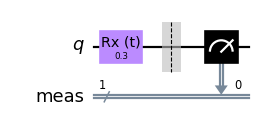

In [32]:
from qiskit import QuantumCircuit 
from qiskit.providers.aer import QasmSimulator
from qiskit.compiler import transpile
backend = QasmSimulator()

qc = QuantumCircuit(1)
qc.rx(0.3,0,"Rx (t)")  # the angle of 0.3 is chosen arbitrary for illustration.
qc.measure_all()

qc.draw('mpl',scale=1.1)

on real Hardware we have a limited instruction set only, so we need to "transpile" our code ...

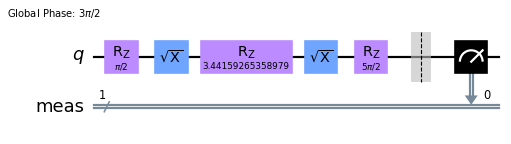

In [33]:
backend = QasmSimulator()

qc = QuantumCircuit(1)
qc.rx(0.3,0,"Rx time dependent")
qc.measure_all()

qc = transpile(qc, backend=backend, basis_gates=['id', 'rz', 'sx', 'x', 'cx', 'reset'], optimization_level=2)

qc.draw('mpl',scale=1.1)

In [34]:
backend = QasmSimulator()
import numpy as np

DIVISOR=100
PEROID=6
bars=("")
stats={}

# Build a 1 Qubit cirquit and use the X gate to rotate according to remaining probability, then measure the statistics 

for t in range(0,PEROID*DIVISOR,1) :
    bars=bars+str(t)
    x = np.exp(-t/DIVISOR/2)
    angle = np.arctan(1-x)*4
    
    qc = QuantumCircuit(1)
    qc.rx(angle,0)
    qc.measure_all()
    
    qc = transpile(qc, backend=backend, basis_gates=['id', 'rz', 'sx', 'x', 'cx', 'reset'], optimization_level=3)

    job = backend.run([qc])
    stats[t] = job.result().get_counts()


#preparing data for the plot, split the job.results().get_counts into appropriate format
wert0=[]
wert1=[]
v=list(stats.items()) 
for t in range(1,PEROID*DIVISOR) :
    w0=v[t][0]
    w1=v[t][1]    
    wert0.append(w1.get('0'))
    wert1.append(w1.get('1'))

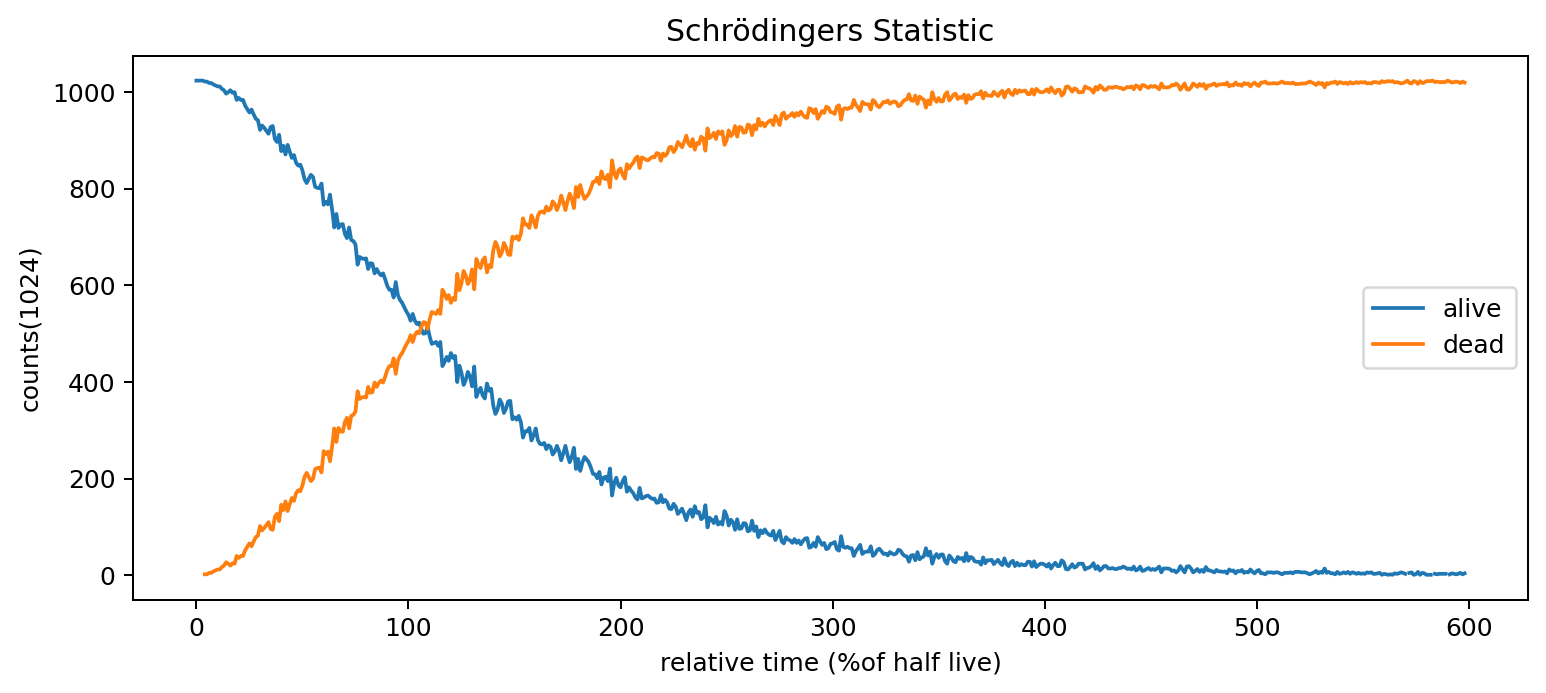

In [35]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#plotting
%matplotlib inline
figure(figsize = (10, 4), dpi = 180)
y_pos = np.arange(PEROID*DIVISOR-1)

plt.xlabel('relative time (%of half live)')
plt.ylabel('counts(1024)')
plt.title("Schrödingers Statistic")
plt.plot(y_pos,wert0,label="alive")
plt.plot(y_pos,wert1,label="dead")
plt.legend()

plt.show()